In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load the datasets (ensure correct paths and files)
train_features = pd.read_csv('../data/processed_data/training_features.csv')
train_labels = pd.read_csv('../data/processed_data/train_labels.csv')

# Ensure train_labels is properly aligned
if train_labels.shape[1] > 1:
    train_labels = train_labels.iloc[:, 0]

print(train_features.shape)
print(train_labels.shape)

# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply L1 Regularization (Lasso) Logistic Regression
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # C controls regularization strength
log_reg_l1.fit(X_train_scaled, y_train)

# Predict with Logistic Regression
y_pred = log_reg_l1.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Random Forest (no scaling needed)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Export the trained Logistic Regression model
#joblib.dump(log_reg_l1, 'logreg_model.pkl')  # Save the model to a file


(14040, 13)
(14040, 1)
Logistic Regression Accuracy: 0.8856837606837606
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1230
           1       0.94      0.85      0.89      1578

    accuracy                           0.89      2808
   macro avg       0.89      0.89      0.89      2808
weighted avg       0.89      0.89      0.89      2808



C:\Users\fishm\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fishm\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.8885327635327636
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1230
           1       0.93      0.87      0.90      1578

    accuracy                           0.89      2808
   macro avg       0.89      0.89      0.89      2808
weighted avg       0.89      0.89      0.89      2808



In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports L1 regularization
}

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Removed 'auto' to avoid deprecation warning
}

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to tune hyperparameters
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search_lr.fit(X_train_scaled, y_train)  # Logistic Regression uses scaled features

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)  # Random Forest uses unscaled features

# Fit the best models and predict
best_log_reg = grid_search_lr.best_estimator_
best_rf = grid_search_rf.best_estimator_

log_reg_pred = best_log_reg.predict(X_test_scaled)
rf_pred = best_rf.predict(X_test)

# Predicted probabilities for ROC-AUC
log_reg_pred_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]
rf_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Print Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Print Classification Reports
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# ROC-AUC Score
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, log_reg_pred_proba))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_pred_proba))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\fishm\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\fishm\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Logistic Regression Accuracy: 0.8856837606837606
Random Forest Accuracy: 0.8938746438746439
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1230
           1       0.94      0.85      0.89      1578

    accuracy                           0.89      2808
   macro avg       0.89      0.89      0.89      2808
weighted avg       0.89      0.89      0.89      2808

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1230
           1       0.94      0.87      0.90      1578

    accuracy                           0.89      2808
   macro avg       0.89      0.90      0.89      2808
weighted avg       0.90      0.89      0.89      2808

Logistic Regression ROC-AUC: 0.9239198532669737
Random Forest ROC-AUC: 0.9336867703277794


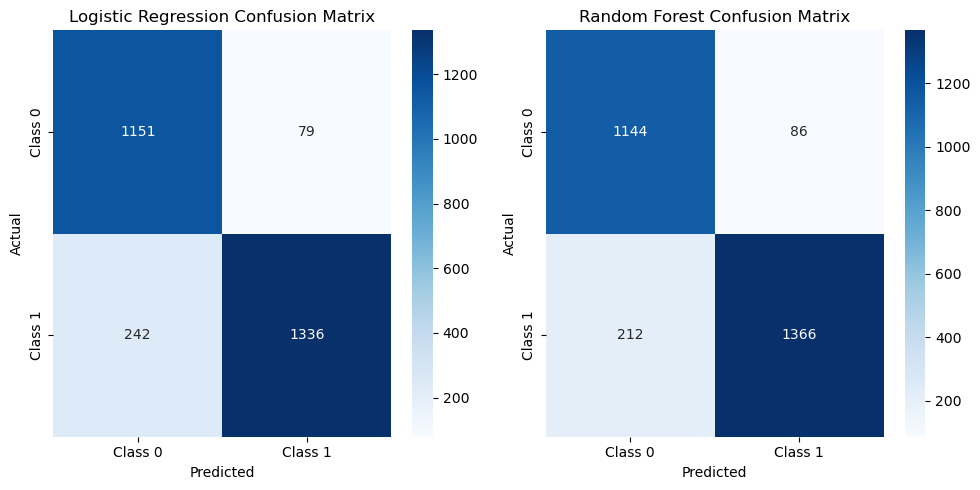

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrices
conf_matrix_logreg = confusion_matrix(y_test, log_reg_pred)
conf_matrix_rf = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()

plt.savefig('../visuals/Model Results/LRvsRF_hyptertuned_confusion_matrix.png', bbox_inches='tight')

plt.show()


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports L1 regularization
}

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize logistic regression model
log_reg = LogisticRegression()

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to tune hyperparameters
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

C:\Users\fishm\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fishm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fishm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fishm\anaconda3\lib\sit

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [38]:
from sklearn.metrics import roc_auc_score, classification_report

# Fit the best models and predict
best_log_reg = grid_search_lr.best_estimator_
best_rf = grid_search_rf.best_estimator_

log_reg_pred = best_log_reg.predict(X_test_scaled)
rf_pred = best_rf.predict(X_test_scaled)

# Print Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Print Classification Report for each model
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# ROC-AUC Score
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, log_reg_pred))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_pred))


Logistic Regression Accuracy: 0.8856837606837606
Random Forest Accuracy: 0.8938746438746439
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1230
           1       0.94      0.85      0.89      1578

    accuracy                           0.89      2808
   macro avg       0.89      0.89      0.89      2808
weighted avg       0.89      0.89      0.89      2808

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1230
           1       0.94      0.87      0.90      1578

    accuracy                           0.89      2808
   macro avg       0.89      0.90      0.89      2808
weighted avg       0.90      0.89      0.89      2808

Logistic Regression ROC-AUC: 0.8912068379238925
Random Forest ROC-AUC: 0.8978670128906613
